In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# A3C Batch Size Plots:

## Converting outputted text files to lists of floats to plot:

In [4]:
def convert_file_to_float_list(filename):
    float_list = []
    with open(filename) as f:
        for line in f:
            inner_list = [t.strip('"').strip('\n').strip('"') for t in line.split(',')]
            float_list.append(inner_list)
    float_list = [np.float(x) for x in float_list[0]]
    return float_list

In [35]:
ten_bs_data = convert_file_to_float_list('10_batch_size.txt')

In [37]:
fifty_bs_data = convert_file_to_float_list('50_batch_size.txt')

In [38]:
twohun_bs_data = convert_file_to_float_list('200_batch_size.txt')

In [39]:
fivehun_bs_data = convert_file_to_float_list('500_batch_size.txt')

## Creating dataset out of data:

In [74]:
def convert_to_df(data, batch_size):
    df = pd.DataFrame(data, columns=['Episode Reward'])
    df['Batch Size'] = batch_size
    return df

In [75]:
ten_bs_df = convert_to_df(ten_bs_data, 10)
fifty_bs_df = convert_to_df(fifty_bs_data, 50)
twohun_bs_df = convert_to_df(twohun_bs_data, 200)
fivehun_bs_df = convert_to_df(fivehun_bs_data, 500)

In [76]:
merged_dfs = pd.concat([ten_bs_df, fifty_bs_df, twohun_bs_df, fivehun_bs_df])
merged_dfs["Global Episode"] = merged_dfs.index

## Plotting Comparative Line Chart:

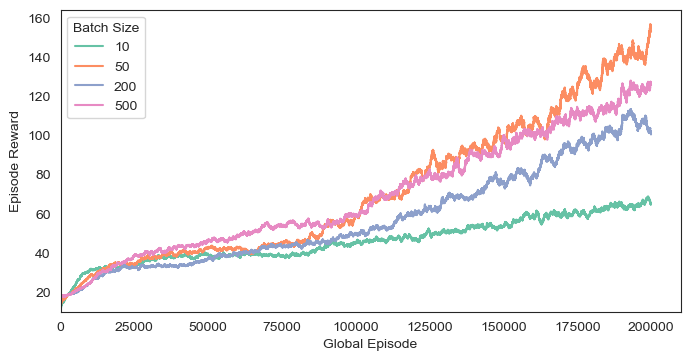

In [101]:
sns.set_style("white")

fig, ax = plt.subplots(figsize = (8,4), dpi=100)

sns.lineplot(data=merged_dfs, x="Global Episode", y="Episode Reward", hue="Batch Size", palette='Set2')

plt.xlim(0)
plt.ylim(10)
#plt.savefig('A3C_Batch_Size_Plots.png', bbox_inches='tight')
plt.show()

# A3C Learning Rate Plots:

## Loading and Converting Data:

In [114]:
# All are done with 50 batch size, 0.9 gamma, 200k episodes, 8 Workers:
lr_0_00001_data = convert_file_to_float_list('50_batch_size.txt')
lr_0_0001_data = convert_file_to_float_list('0_0001_lr.txt')
lr_0_001_data = convert_file_to_float_list('0_001_lr.txt')

In [115]:
def convert_to_df_lr(data, lr):
    df = pd.DataFrame(data, columns=['Episode Reward'])
    df['Learning Rate'] = lr
    return df

In [119]:
lr_0_00001_df = convert_to_df_lr(lr_0_00001_data, 0.00001)
lr_0_0001_df = convert_to_df_lr(lr_0_0001_data, 0.0001)
lr_0_001_df = convert_to_df_lr(lr_0_001_data, 0.001)

In [120]:
merged_lr_dfs = pd.concat([lr_0_00001_df, lr_0_0001_df, lr_0_001_df])
merged_lr_dfs["Global Episode"] = merged_lr_dfs.index

In [125]:
merged_lr_dfs.sort_values(by='Global Episode').head()

,Episode Reward,Learning Rate,Global Episode
0,13.000,0.00001,0
0,40.000,0.00010,0
0,8.000,0.00100,0
1,8.010,0.00100,1
1,13.022,0.00001,1


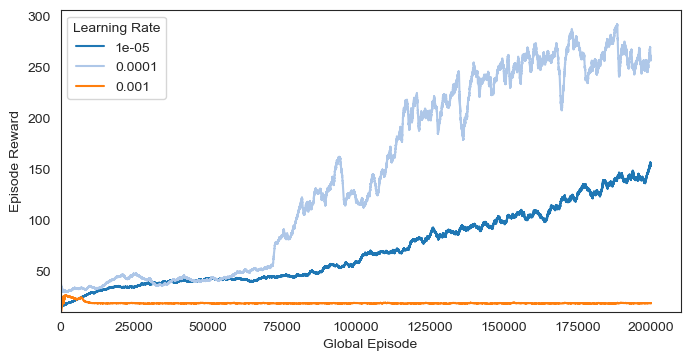

In [138]:
fig, ax = plt.subplots(figsize = (8,4), dpi=100)

sns.lineplot(data=merged_lr_dfs, x="Global Episode", y="Episode Reward", 
             hue="Learning Rate", palette = 'tab20')

plt.xlim(0)
plt.ylim(10)
#plt.savefig('A3C_Learning_Rate_Plots.png', bbox_inches='tight')
plt.show()

# Number of Workers Plots:

In [63]:
# All are done with 50 batch size, 0.9 gamma, 200k episodes:
worker_1_data = convert_file_to_float_list('1_worker.txt')
worker_4_data = convert_file_to_float_list('4_workers.txt')
worker_8_data = convert_file_to_float_list('8_workers.txt')
worker_12_data = convert_file_to_float_list('12_workers.txt')

In [22]:
def convert_to_df_wrk(data, wrk):
    df = pd.DataFrame(data, columns=['Episode Reward'])
    df['Workers'] = wrk
    return df

In [64]:
worker_1_df = convert_to_df_wrk(worker_1_data, 1)
worker_4_df = convert_to_df_wrk(worker_4_data, 4)
worker_8_df = convert_to_df_wrk(worker_8_data, 8)
worker_12_df = convert_to_df_wrk(worker_12_data, 12)

In [65]:
merged_wrk_dfs = pd.concat([worker_8_df, worker_4_df, worker_1_df, worker_12_df])
merged_wrk_dfs["Global Episode"] = merged_wrk_dfs.index

In [25]:
merged_wrk_dfs = merged_wrk_dfs.sort_values(by='Global Episode')
merged_wrk_dfs.head()

,Episode Reward,Workers,Global Episode
0,13.000,8,0
0,12.000,4,0
0,17.000,12,0
0,18.000,1,0
1,17.001,12,1


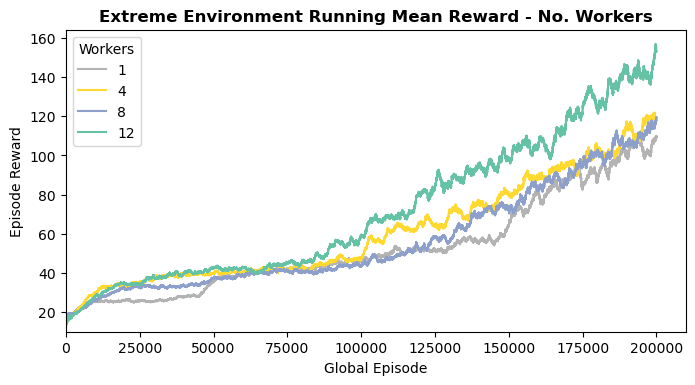

In [66]:
fig, ax = plt.subplots(figsize = (8,4), dpi=100)

sns.lineplot(data=merged_wrk_dfs, x="Global Episode", y="Episode Reward", 
             hue="Workers", palette = 'Set2_r')

plt.xlim(0)
plt.ylim(10)
plt.title("Extreme Environment Running Mean Reward - No. Workers", fontweight = 'bold')
plt.savefig('A3C_No_Workers_Plots.png', bbox_inches='tight')
plt.show()

# Number of Layers Plots:

In [58]:
adv_1_layer_data = convert_file_to_float_list('adv_single_layer.txt')
adv_2_layer_data = convert_file_to_float_list('adv_two_layer.txt')
extr_1_layer_data = convert_file_to_float_list('extr_single_layer.txt')
# The 12 workers was run with the same parameters as above, but with 2 layers
extr_2_layer_data = convert_file_to_float_list('12_workers.txt')

In [30]:
def convert_to_df_layers(data, layer):
    df = pd.DataFrame(data, columns=['Episode Reward'])
    df['Hidden Layers'] = layer
    return df

In [59]:
adv_1_layer_df = convert_to_df_layers(adv_1_layer_data, "1 - Advanced")
adv_2_layer_df = convert_to_df_layers(adv_2_layer_data, "2 - Advanced")
extr_1_layer_df = convert_to_df_layers(extr_1_layer_data, "1 - Extreme")
extr_2_layer_df = convert_to_df_layers(extr_2_layer_data, "2 - Extreme")

In [76]:
merged_layers_df = pd.concat([adv_1_layer_df, adv_2_layer_df, extr_1_layer_df, extr_2_layer_df])
merged_layers_df["Global Episode"] = merged_layers_df.index
merged_layers_df = merged_layers_df.sort_values(by='Global Episode')
merged_layers_df.head()

,Episode Reward,Hidden Layers,Global Episode
0,4.000,1 - Advanced,0
0,17.000,2 - Advanced,0
0,17.000,2 - Extreme,0
0,15.000,1 - Extreme,0
1,17.001,2 - Extreme,1


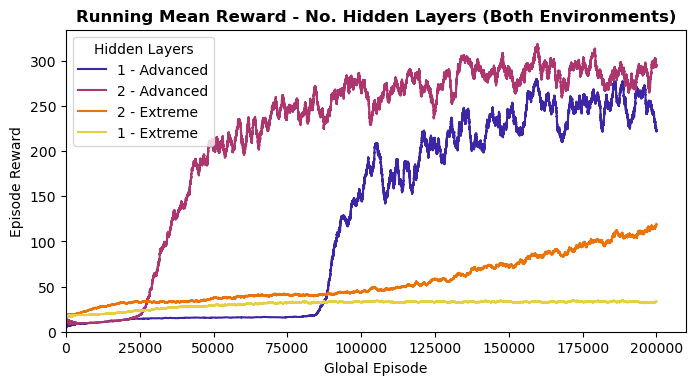

In [77]:
fig, ax = plt.subplots(figsize = (8,4), dpi=100)

sns.lineplot(data=merged_layers_df, x="Global Episode", y="Episode Reward", 
             hue="Hidden Layers", palette = 'CMRmap')

plt.xlim(0)
plt.ylim(0)
plt.title("Running Mean Reward - No. Hidden Layers (Both Environments)", fontweight = 'bold')
plt.savefig('A3C_Layers_Plots.png', bbox_inches='tight')
plt.show()